In [2]:
from splinx.spline import *
import jax.numpy as jnp
from jax import config

In [4]:
config.update('jax_platform_name', 'cpu')

(2, 11)


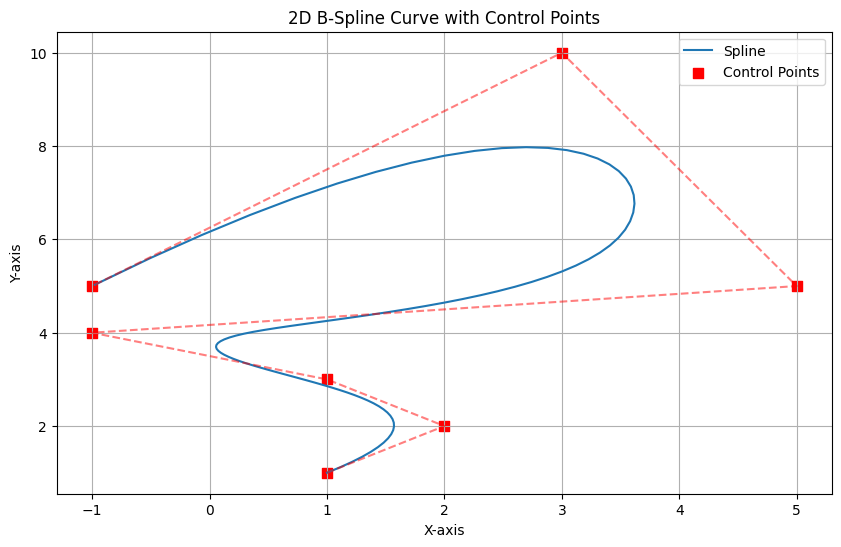

In [6]:
num_sample = 100
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, .999, num_sample)[None, :], 2, axis=0)

coef = jnp.array([[1,2,1,-1,5,3,-1],
                  [1,2,3,4,5,10,5]])
num_grid_interval = coef.shape[1] - k
grids = jnp.einsum('i,j->ij', jnp.ones(2,), jnp.linspace(-1,1,num_grid_interval+1))
extended_grids = extend_grid(grids, k, clamp=True)

print(extended_grids.shape)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids, coef, k=k)

plt.figure(figsize=(10, 6))
plt.plot(y_eval[0, :], y_eval[1, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
plt.scatter(ctrl_points_x, ctrl_points_y, marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(ctrl_points_x, ctrl_points_y, 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

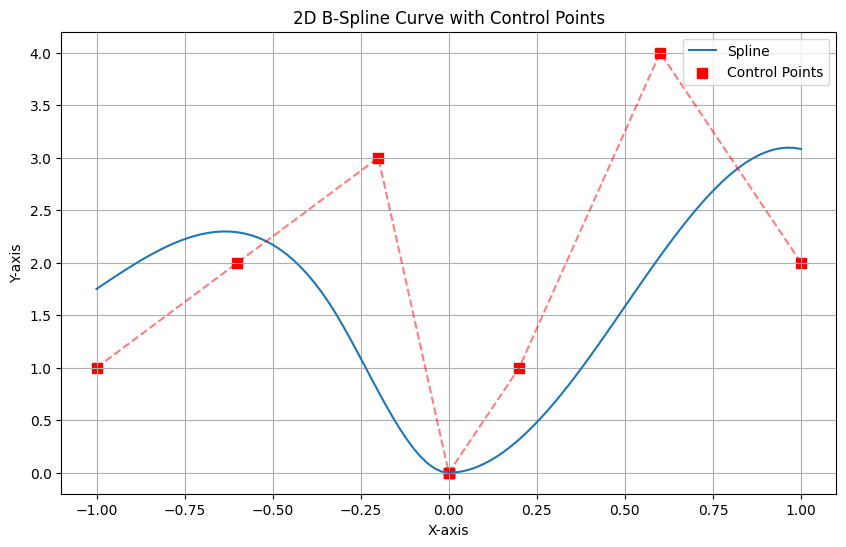

In [5]:
num_sample = 100
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

# grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
grid_around_zero = jnp.tile(jnp.array([-.0001,0,.0001]), (grids.shape[0], 1))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids, coef, k=k)
# print(y_eval)

plt.figure(figsize=(10, 6))
plt.plot(x_eval[0, :], y_eval[0, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
domain = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1, coef.shape[1]-k))
domain = jnp.hstack([domain[:, :domain.shape[1]//2], jnp.zeros((domain.shape[0], k)), domain[:, domain.shape[1]//2:]])
plt.scatter(domain[0], coef[0], marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(domain[0], coef[0], 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

## How to define derivative of spline?

(1, 13)
(1, 8) (1, 8)
[[ 2.2499995  2.2501686 -9.         0.         0.         3.
   6.750506  -4.5      ]]
[[-2.0000000e+00 -1.6666667e+00 -1.3333334e+00 -1.0000000e+00
  -3.3333328e-01 -9.9999997e-05  0.0000000e+00  9.9999997e-05
   3.3333337e-01  1.0000000e+00  1.3333334e+00  1.6666667e+00
   2.0000000e+00]]


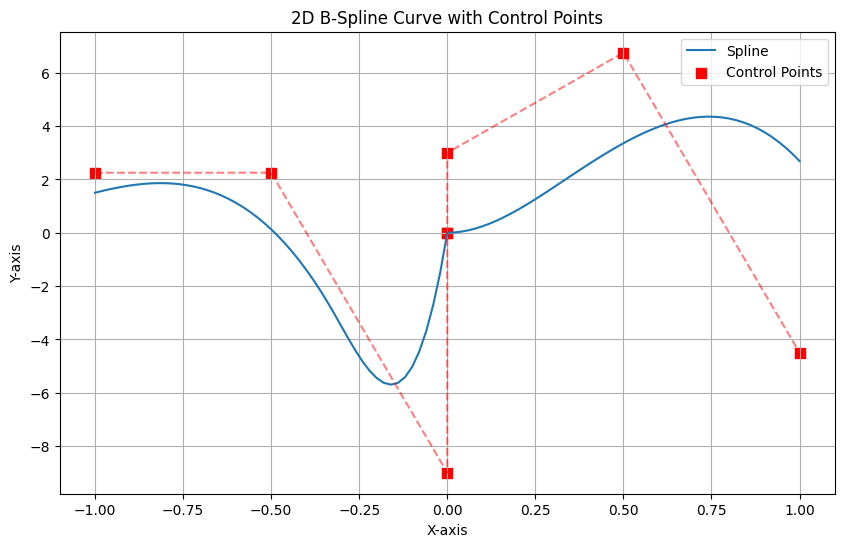

In [48]:
num_sample = 100
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

# grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
grid_around_zero = jnp.tile(jnp.array([-.0001,0,.0001]), (grids.shape[0], 1))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)

print(extended_grids.shape)
print((extended_grids[:,4:-1] - extended_grids[:,1:-4]).shape, (coef[:,1:] - coef[:,:-1]).shape)
coef = (coef[:,1:] - coef[:,:-1]) * 3 / (extended_grids[:,4:-1] - extended_grids[:,1:-4])
print(coef)
print(extended_grids)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids[:,1:], coef, k=k)
# print(y_eval)

plt.figure(figsize=(10, 6))
plt.plot(x_eval[0, :], y_eval[0, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
domain = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1, coef.shape[1]-k))
domain = jnp.hstack([domain[:, :domain.shape[1]//2], jnp.zeros((domain.shape[0], k)), domain[:, domain.shape[1]//2:]])
plt.scatter(domain[0], coef[0], marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(domain[0], coef[0], 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()